# **REPORT**

## **Clustering Analysis Report: K-Means and GMM-Clustering**

**OBJECTIVE:**

The objective of the project is to compare the effectiveness of two clustering methods, K-Means Clustering and Gaussian Mixture Model Clustering, using a specific dataset.

The dataset contains information related to Car's price, model, brand, mileage and year of production. The goal is to determine which clustering method yields more meaningful and interpretable clusters based on these features.

By evaluating the Silhouette Score and Davies-Bouldin Score for each clustering method, the project aims to identify the technique that provides the most distinct and well-separated clusters. This analysis will help in understanding the underlying patterns and relationships within the data, ultimately guiding decision-making processes and potentially uncovering insights for targeted marketing or customer segmentation strategies.


---



**OBSERVATIONS:**

K-Means Clustering:

         Time Taken: 2.26 seconds
         Memory Used: 16.00 MB

         Cluster Sizes:
         Cluster 1: 50033
         Cluster 0: 49967

         Evaluation Metrics:
         DB Score: 0.502
         Silhouette Score: 0.626

Gaussian Mixture Model (GMM) Clustering:

         Time Taken: 0.79 seconds
         Memory Used: -26.14 MB (Negative value - potential measurement anomaly)

         Cluster Sizes:
         Cluster 1: 49126
         Cluster 2: 48344
         Cluster 0: 2530

         Evaluation Metrics:
         DB Score: 1.42
         Silhouette Score: 0.264


---

**ANALYSIS**

1. While K-Means had a reasonable execution time and memory consumption, GMM showcased superior efficiency with a significantly faster runtime. However, the negative memory usage in GMM raises concerns and requires careful scrutiny to ensure accurate profiling.

2. K-Means delivered a simpler, binary clustering structure with relatively balanced sizes. GMM, on the other hand, presented a more intricate clustering scheme with greater flexibility in accommodating diverse cluster sizes and shapes.

3. Davies-Bouldin Score: K-Means outperformed GMM, indicating better-defined and more separated clusters. GMM's higher DB score suggests potential challenges in precise cluster boundary definition.

  Silhouette Score: K-Means demonstrated a higher Silhouette Score, emphasizing well-defined and cohesive clusters. GMM's lower Silhouette Score suggests a degree of overlap or ambiguity in cluster assignments.


---

**MANAGERIAL IMPLICATIONS**

1. Decision Support: For managerial decisions requiring clear, well-defined clusters, K-Means might be preferable due to its strong performance in evaluation metrics.
2. Flexibility in Cluster Shapes: If there's uncertainty about the shape of clusters or if flexibility is crucial, GMM could be advantageous, as it accommodates different cluster shapes.
3. Resource Considerations: Considering the computational efficiency, K-Means may be more suitable for larger datasets, while GMM might be preferable for datasets with varied cluster shapes.

In [1]:
!pip install pydataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 67.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939416 sha256=ec4572207ea4aad53dc7c845087d054de8f2f04ee17c96caf55474538c114d17
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset


In [75]:
pip install psutil


In [2]:
# Required Libraries
import pandas as pd, numpy as np # For Data Manipulation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets
import pandas as pd, numpy as np # For Data Manipulation
import matplotlib.pyplot as plt, seaborn as sns # For Data Visualization
import seaborn as sns
import os
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import plotly.express as px
from sklearn.mixture import GaussianMixture

# **ABOUT THE DATA SET**

This dataset provides a comprehensive collection of randomly generated attributes related to automobiles, encompassing various brands, models, and characteristics. With over 3000 entries, this synthetic dataset offers a diverse representation of cars, making it ideal for a wide range of analytical and modeling tasks within the automotive domain.

**Attributes:**

ID: Unique identifier for each car entry.

Brand: Generated car brand, featuring a wide range of manufacturers.

Model: Corresponding car model based on the selected brand, offering diverse options for analysis.

Year: Assigned manufacturing year, spanning from 1990 to 2022, representing the age of the vehicle.

Color: Selected color for each car entry, providing a visual representation of diversity among vehicles.

Mileage: Generated mileage of the vehicle, indicating the distance traveled and potential wear and tear.

Price: Assigned price of the car, facilitating analysis based on the financial aspect.

Condition: Indicates whether the car is new or used, offering insights into its current state.

**Purpose:**

This dataset serves as a valuable resource for various applications, including:

Exploratory Data Analysis (EDA): Researchers and analysts can conduct in-depth exploratory analysis to uncover trends, patterns, and correlations within the automotive domain.

Predictive Modeling: Data scientists can utilize this dataset to build and train machine learning models for tasks such as price prediction, condition classification, and mileage estimation.

Market Research: Automotive industry professionals can leverage this dataset for market research purposes, gaining insights into consumer preferences, pricing trends, and brand popularity.

In [3]:
df = pd.read_csv("Car_Data2.csv")

In [4]:
df

ID       Brand            Model  Year   Color    Mileage  Price  \
0           1       Mazda  Generic Model 3  2003    Blue  12.032885  65732   
1           2      Jaguar  Generic Model 2  2003  Silver   6.260853  58620   
2           3  Land Rover  Generic Model 2  2022   Green  14.929521  50574   
3           4     Porsche  Generic Model 2  1997   Black  14.966376  35436   
4           5  Land Rover  Generic Model 3  2000   Black  10.402131  63880   
...       ...         ...              ...   ...     ...        ...    ...   
99995   99996       Lexus  Generic Model 1  2018     Red  13.515379  31762   
99996   99997      Nissan  Generic Model 1  2015   Green   5.134586  78376   
99997   99998  Land Rover  Generic Model 1  2009   White   6.914035  45681   
99998   99999      Toyota           Tacoma  2010   White  12.773766  15085   
99999  100000  Volkswagen  Generic Model 2  2017    Blue  14.916199  22866   

      Condition  
0           New  
1           New  
2           New  
3          Used  
4          Used  
...         ...  
99995       New  
99996       New  
99997      Used  
99998      Used  
99999       New  

[100000 rows x 8 columns]

In [5]:
df.describe()

ID          Year        Mileage          Price
count  100000.000000  100000.00000  100000.000000  100000.000000
mean    50000.500000    2006.03409       9.995744   42534.519370
std     28867.657797       9.52722       2.882307   21632.296692
min         1.000000    1990.00000       5.000013    5000.000000
25%     25000.750000    1998.00000       7.498035   23826.750000
50%     50000.500000    2006.00000       9.984452   42563.500000
75%     75000.250000    2014.00000      12.496175   61197.500000
max    100000.000000    2022.00000      14.999983   80000.000000

In [6]:
cats = ["Brand", "Model", "Color", "Condition"]

# **Count of categories**

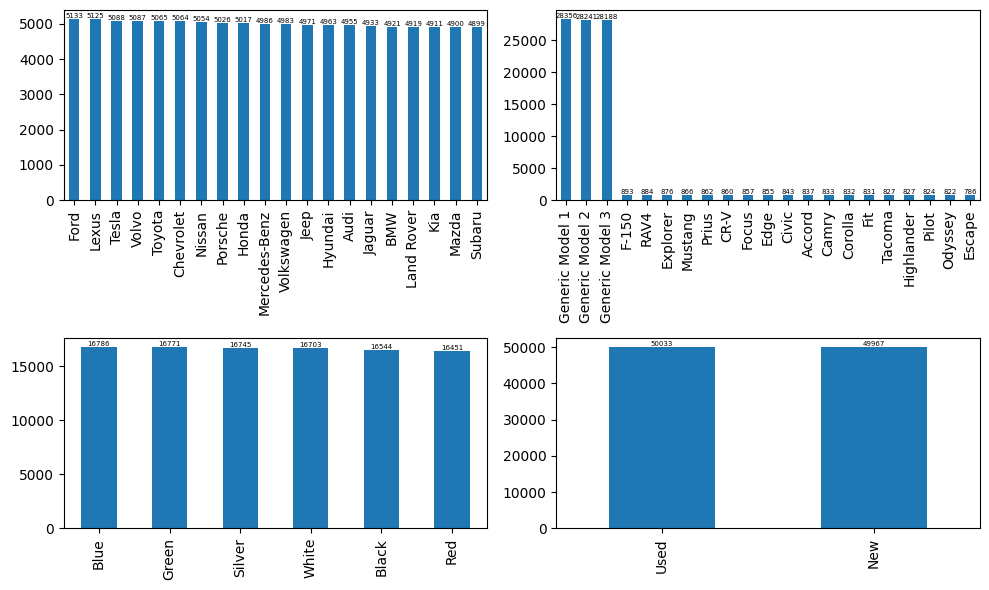

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
index = 0
for i in range(2):
    for j in range(2):
        counts = df[cats[index]].value_counts()
        counts.plot(kind="bar", ax=axes[i][j])
        for container in axes[i][j].containers:
            axes[i][j].bar_label(container, size=5)
        index += 1
plt.tight_layout()
plt.show()

 **Crosstabs visualised**

In [8]:
for i in range(len(cats)-1):
    for j in range(i+1, len(cats)):
        if cats[i] != "Model" and cats[j] != "Model":
            print(pd.crosstab(df[cats[i]], df[cats[j]]))
            fig = px.parallel_categories(df[[cats[i], cats[j]]])
            fig.show()

Color          Black  Blue  Green  Red  Silver  White
Brand                                                
Audi             857   811    836  794     791    866
BMW              827   809    811  836     819    819
Chevrolet        809   872    823  859     860    841
Ford             869   854    847  862     866    835
Honda            859   833    802  850     850    823
Hyundai          795   841    863  794     862    808
Jaguar           827   862    847  792     791    814
Jeep             808   812    866  796     858    831
Kia              841   815    804  806     835    810
Land Rover       785   808    883  817     825    801
Lexus            873   862    895  818     824    853
Mazda            817   827    829  819     791    817
Mercedes-Benz    802   851    821  846     829    837
Nissan           816   832    857  784     915    850
Porsche          839   859    825  843     806    854
Subaru           801   813    782  843     871    789
Tesla            835   859  

Condition       New  Used
Brand                    
Audi           2481  2474
BMW            2446  2475
Chevrolet      2518  2546
Ford           2560  2573
Honda          2475  2542
Hyundai        2468  2495
Jaguar         2481  2452
Jeep           2475  2496
Kia            2449  2462
Land Rover     2434  2485
Lexus          2609  2516
Mazda          2386  2514
Mercedes-Benz  2486  2500
Nissan         2559  2495
Porsche        2470  2556
Subaru         2548  2351
Tesla          2505  2583
Toyota         2559  2506
Volkswagen     2528  2455
Volvo          2530  2557


Condition   New  Used
Color                
Black      8188  8356
Blue       8308  8478
Green      8359  8412
Red        8255  8196
Silver     8355  8390
White      8502  8201


In [9]:
nums = ["Mileage", "Price"]

In [10]:
def plots(df, name, nums, ax):
    group = df.groupby(name)
    mean = group[nums].mean()
    sns.barplot(x=mean.index, y=mean, ax=ax)
    for container in ax.containers:
        ax.bar_label(container, label_type="center", rotation=90)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# **BOX-PLOT**

<ipython-input-11-4746b89bcaf4>:6: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-11-4746b89bcaf4>:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



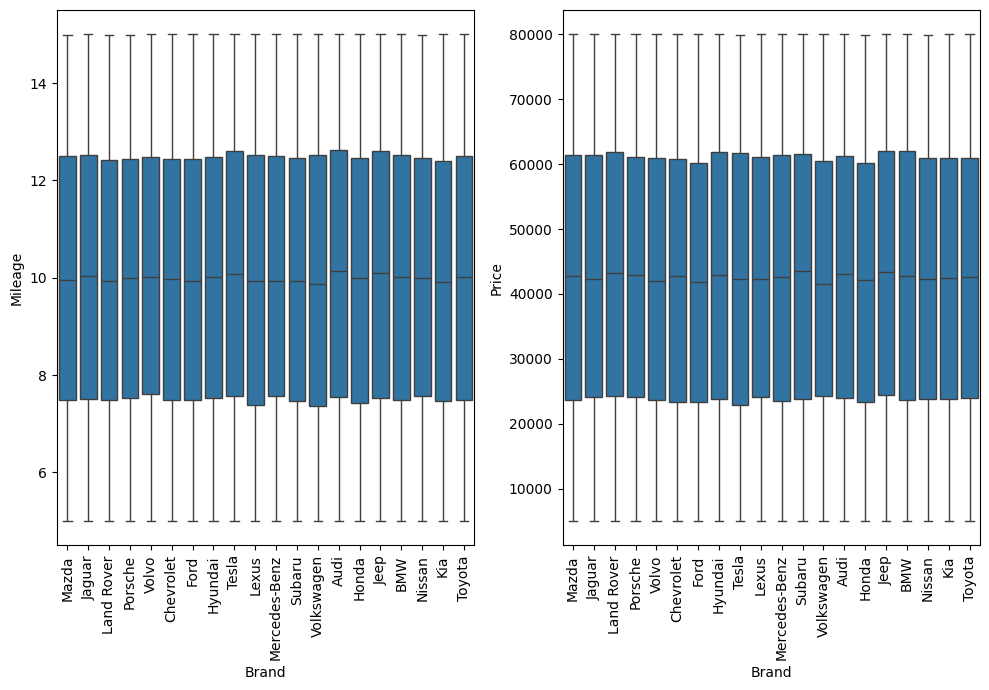

<ipython-input-11-4746b89bcaf4>:6: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-11-4746b89bcaf4>:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



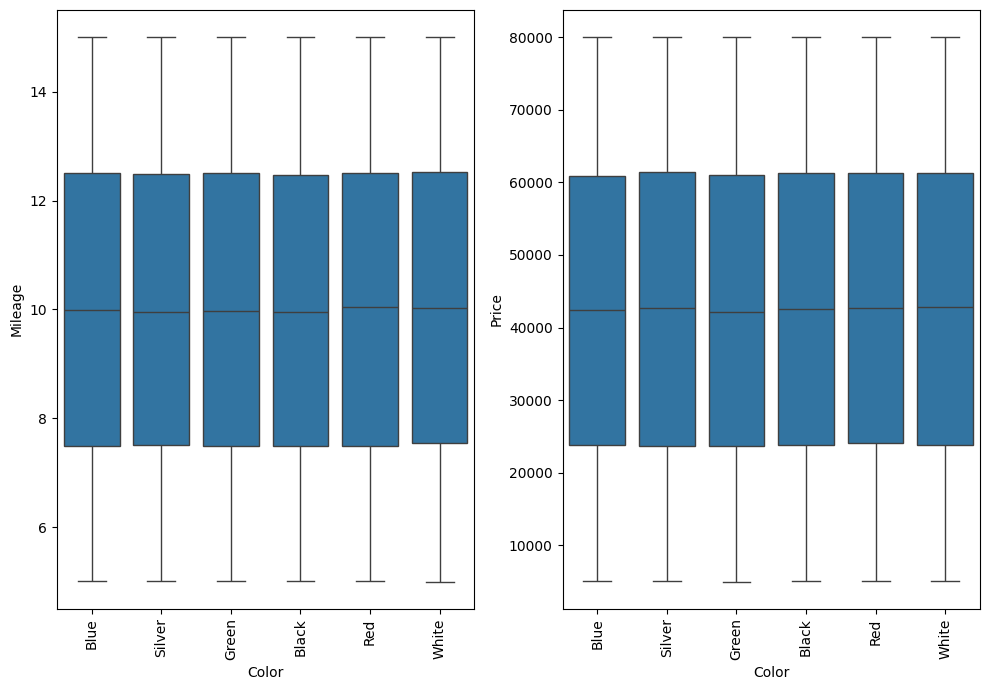

<ipython-input-11-4746b89bcaf4>:6: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-11-4746b89bcaf4>:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



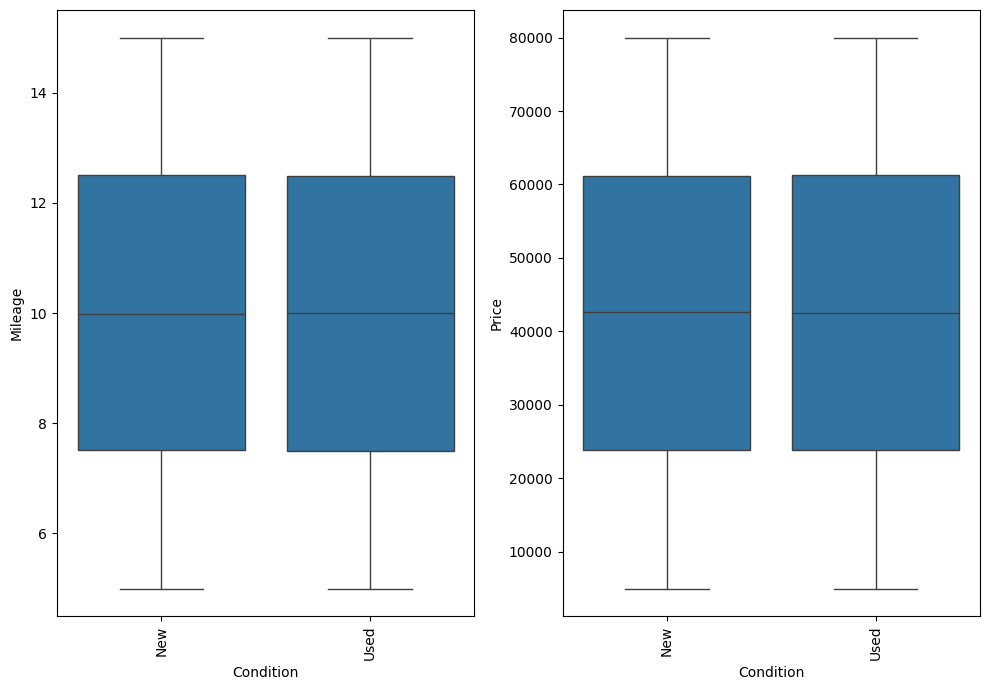

<ipython-input-11-4746b89bcaf4>:6: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-11-4746b89bcaf4>:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



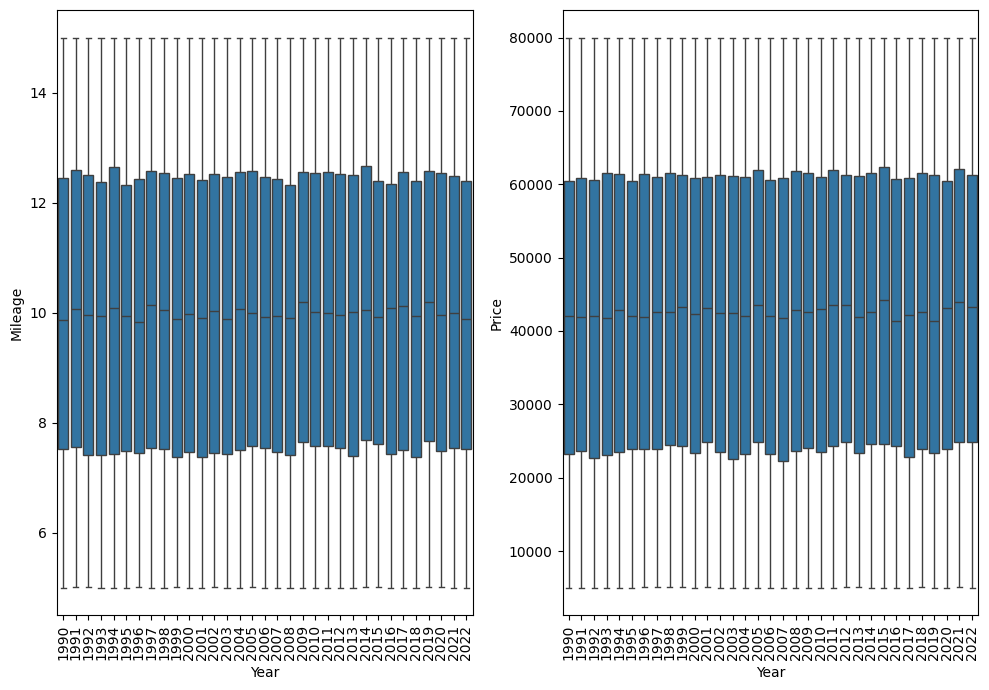

In [11]:
for i in cats+["Year"]:
    if i != "Model":
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))
        sns.boxplot(df, x=i, y=nums[0], ax=axes[0])
        sns.boxplot(df, x=i, y=nums[1], ax=axes[1])
        axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
        axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
        plt.tight_layout()
        plt.show()

# **Data Pre-Processing**
**OBJECTIVES:**

Identifying the null values in both cat and non-cat datasets

1. Treating the null values by imputation
2. Numeric coding of cat variables
3. Identifying outliers using boxplots
4. Treating the outliers
5. Combining the pre-processed cat and non-cat dataframes into one (df_ppd)

**Brief on Analysis:**

The null values in the datasets were indentified using the info() functions

These null values were then treated using Simple Imputer with strategy as 'mean'

Numeric encoding of the categorical variables (Distribution Channel and Market Segment) was done using Label Encoder as the data was nominal

After identifying the outliers in each variable, they were treated using Normalization -> Min-Max Scaling

The cat and non_cat pre-processed datasets were then merged into one using the 'merge' function.

In [12]:
missing_values = ["NaN"]
df = pd.read_csv("Car_Data2.csv", na_values=missing_values)

In [13]:
variable_missing_data = df.isna().sum(); variable_missing_data # Variable-wise Missing Data Information

ID           0
Brand        0
Model        0
Year         0
Color        0
Mileage      0
Price        0
Condition    0
dtype: int64

In [14]:
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(5); record_missing_data

0        0
66650    0
66672    0
66671    0
66670    0
dtype: int64

In [15]:
df.dropna(how="all")

ID       Brand            Model  Year   Color    Mileage  Price  \
0           1       Mazda  Generic Model 3  2003    Blue  12.032885  65732   
1           2      Jaguar  Generic Model 2  2003  Silver   6.260853  58620   
2           3  Land Rover  Generic Model 2  2022   Green  14.929521  50574   
3           4     Porsche  Generic Model 2  1997   Black  14.966376  35436   
4           5  Land Rover  Generic Model 3  2000   Black  10.402131  63880   
...       ...         ...              ...   ...     ...        ...    ...   
99995   99996       Lexus  Generic Model 1  2018     Red  13.515379  31762   
99996   99997      Nissan  Generic Model 1  2015   Green   5.134586  78376   
99997   99998  Land Rover  Generic Model 1  2009   White   6.914035  45681   
99998   99999      Toyota           Tacoma  2010   White  12.773766  15085   
99999  100000  Volkswagen  Generic Model 2  2017    Blue  14.916199  22866   

      Condition  
0           New  
1           New  
2           New  
3          Used  
4          Used  
...         ...  
99995       New  
99996       New  
99997      Used  
99998      Used  
99999       New  

[100000 rows x 8 columns]

**Data Bifurcation**

In [16]:

df_cat = df[['Brand','Model', 'Year', 'Condition','Color']] # Categorical Data [Nominal | Ordinal]
df_noncat = df[[ 'ID','Price','Mileage']] # Non-Categorical Data
df_cat
df_noncat.head(2)

ID  Price    Mileage
0   1  65732  12.032885
1   2  58620   6.260853

# **Missing data Imputation**

In [17]:
si_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # Strategy = median [When Odd Number of Categories Exists]
si_cat_fit = si_cat.fit_transform(df_cat)
df_cat_mdi = pd.DataFrame(si_cat_fit, columns=df_cat.columns); df_cat_mdi # Missing Categorical Data Imputed Subset
df_cat_mdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Brand      100000 non-null  object
 1   Model      100000 non-null  object
 2   Year       100000 non-null  object
 3   Condition  100000 non-null  object
 4   Color      100000 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [18]:
si_noncat = SimpleImputer(missing_values=np.nan, strategy='mean')
si_noncat_fit = si_noncat.fit_transform(df_noncat)
df_noncat_mdi_si = pd.DataFrame(si_noncat_fit, columns=df_noncat.columns); df_noncat_mdi_si
df_noncat_mdi_si.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ID       100000 non-null  float64
 1   Price    100000 non-null  float64
 2   Mileage  100000 non-null  float64
dtypes: float64(3)
memory usage: 2.3 MB


In [19]:
# Excluding Empty Records (If Any)
df_cat_mdi.dropna(axis=0, how='all', inplace=True) # Categorical Data Subset
df_noncat_mdi_si.dropna(axis=0, how='all', inplace=True) # Non-Categorical Data Subset
#df_noncat_mdi_ki.dropna(axis=0, how='all', inplace=True) # Non-Categorical Data Subset

In [20]:
# Excluding Empty Variables (If Any)
df_cat_mdi.dropna(axis=1, how='all', inplace=True) # Categorical Data Subset
df_noncat_mdi_si.dropna(axis=1, how='all', inplace=True) # Non-Categorical Data Subset
#df_noncat_mdi_ki.dropna(axis=1, how='all', inplace=True) # Non-Categorical Data Subset

In [21]:
df_cat_mdt = df_cat_mdi.copy() # Missing Categorical Treated Dataset
df_noncat_mdt = df_noncat_mdi_si.copy() # Missing Non-Categorical Treated Dataset
#df_noncat_mdt = df_noncat_mdi_ki.copy() # Missing Non-Categorical Treated Dataset

**Categorical Data Encoding**

In [22]:
# Dataset Used : df_cat_mdt
df_cat_mdt_code = df_cat_mdt.copy()

# Using Pandas (Inferior)
df_cat_mdt_code_pd = df_cat_mdt_code.astype('category')
df_cat_mdt_code_pd['Condition'] = df_cat_mdt_code_pd['Condition'].cat.codes
df_cat_mdt_code_pd['Brand'] = df_cat_mdt_code_pd['Brand'].cat.codes
df_cat_mdt_code_pd['Model'] = df_cat_mdt_code_pd['Model'].cat.codes
df_cat_mdt_code_pd['Color'] = df_cat_mdt_code_pd['Color'].cat.codes
df_cat_mdt_code_pd # (Missing Data Treated) Numeric Coded Categorical Dataset using Pandas


Brand  Model  Year  Condition  Color
0         11     13  2003          0      1
1          6     12  2003          0      4
2          9     12  2022          0      2
3         14     12  1997          1      0
4          9     13  2000          1      0
...      ...    ...   ...        ...    ...
99995     10     11  2018          0      3
99996     13     11  2015          0      2
99997      9     11  2009          1      5
99998     17     20  2010          1      5
99999     18     12  2017          0      1

[100000 rows x 5 columns]

**Numerical Data Encoding**

In [23]:
# 3.1. Standardization
ss = StandardScaler()
ss_fit = ss.fit_transform(df_noncat_mdt[['Price','Mileage']])
df_noncat_std = pd.DataFrame(ss_fit, columns=['Price_std','Mileage_std']); df_noncat_std
#df_noncat_std = pd.DataFrame(ss_fit, columns=df_noncat_mdt.columns+'_std'); df_noncat_std
df_noncat_mdt_std = df_noncat_mdt.join(df_noncat_std); df_noncat_mdt_std

ID    Price    Mileage  Price_std  Mileage_std
0           1.0  65732.0  12.032885   1.072359     0.706778
1           2.0  58620.0   6.260853   0.743590    -1.295805
2           3.0  50574.0  14.929521   0.371644     1.711755
3           4.0  35436.0  14.966376  -0.328146     1.724541
4           5.0  63880.0  10.402131   0.986746     0.140995
...         ...      ...        ...        ...          ...
99995   99996.0  31762.0  13.515379  -0.497986     1.221124
99996   99997.0  78376.0   5.134586   1.656859    -1.686559
99997   99998.0  45681.0   6.914035   0.145454    -1.069187
99998   99999.0  15085.0  12.773766  -1.268920     0.963824
99999  100000.0  22866.0  14.916199  -0.909225     1.707133

[100000 rows x 5 columns]

In [24]:
# Subset df
df_subset = df[['Price', 'Mileage']]; df_subset

Price    Mileage
0      65732  12.032885
1      58620   6.260853
2      50574  14.929521
3      35436  14.966376
4      63880  10.402131
...      ...        ...
99995  31762  13.515379
99996  78376   5.134586
99997  45681   6.914035
99998  15085  12.773766
99999  22866  14.916199

[100000 rows x 2 columns]

In [25]:

df_cat_mdt_code = df_cat_mdt.copy()

In [26]:
df_noncat_ppd = df_noncat_mdt_std.copy(); df_noncat_ppd
df_noncat_ppd

ID    Price    Mileage  Price_std  Mileage_std
0           1.0  65732.0  12.032885   1.072359     0.706778
1           2.0  58620.0   6.260853   0.743590    -1.295805
2           3.0  50574.0  14.929521   0.371644     1.711755
3           4.0  35436.0  14.966376  -0.328146     1.724541
4           5.0  63880.0  10.402131   0.986746     0.140995
...         ...      ...        ...        ...          ...
99995   99996.0  31762.0  13.515379  -0.497986     1.221124
99996   99997.0  78376.0   5.134586   1.656859    -1.686559
99997   99998.0  45681.0   6.914035   0.145454    -1.069187
99998   99999.0  15085.0  12.773766  -1.268920     0.963824
99999  100000.0  22866.0  14.916199  -0.909225     1.707133

[100000 rows x 5 columns]

In [27]:
df_cat_ppd = df_cat_mdt_code_pd.copy(); df_cat_ppd

Brand  Model  Year  Condition  Color
0         11     13  2003          0      1
1          6     12  2003          0      4
2          9     12  2022          0      2
3         14     12  1997          1      0
4          9     13  2000          1      0
...      ...    ...   ...        ...    ...
99995     10     11  2018          0      3
99996     13     11  2015          0      2
99997      9     11  2009          1      5
99998     17     20  2010          1      5
99999     18     12  2017          0      1

[100000 rows x 5 columns]

**Merging the Processed Categorical and Numerical Data**

In [28]:
# Pre-Processed Dataset
df_ppd = pd.merge(df_cat_ppd, df_noncat_ppd, left_index=True, right_index=True); df_ppd

Brand  Model  Year  Condition  Color        ID    Price    Mileage  \
0         11     13  2003          0      1       1.0  65732.0  12.032885   
1          6     12  2003          0      4       2.0  58620.0   6.260853   
2          9     12  2022          0      2       3.0  50574.0  14.929521   
3         14     12  1997          1      0       4.0  35436.0  14.966376   
4          9     13  2000          1      0       5.0  63880.0  10.402131   
...      ...    ...   ...        ...    ...       ...      ...        ...   
99995     10     11  2018          0      3   99996.0  31762.0  13.515379   
99996     13     11  2015          0      2   99997.0  78376.0   5.134586   
99997      9     11  2009          1      5   99998.0  45681.0   6.914035   
99998     17     20  2010          1      5   99999.0  15085.0  12.773766   
99999     18     12  2017          0      1  100000.0  22866.0  14.916199   

       Price_std  Mileage_std  
0       1.072359     0.706778  
1       0.743590    -1.295805  
2       0.371644     1.711755  
3      -0.328146     1.724541  
4       0.986746     0.140995  
...          ...          ...  
99995  -0.497986     1.221124  
99996   1.656859    -1.686559  
99997   0.145454    -1.069187  
99998  -1.268920     0.963824  
99999  -0.909225     1.707133  

[100000 rows x 10 columns]

In [29]:
# Dropping specified columns
columns_to_drop = ['ID','Year']
df_1 = df_ppd.drop(columns=columns_to_drop)
df_1

Brand  Model  Condition  Color    Price    Mileage  Price_std  \
0         11     13          0      1  65732.0  12.032885   1.072359   
1          6     12          0      4  58620.0   6.260853   0.743590   
2          9     12          0      2  50574.0  14.929521   0.371644   
3         14     12          1      0  35436.0  14.966376  -0.328146   
4          9     13          1      0  63880.0  10.402131   0.986746   
...      ...    ...        ...    ...      ...        ...        ...   
99995     10     11          0      3  31762.0  13.515379  -0.497986   
99996     13     11          0      2  78376.0   5.134586   1.656859   
99997      9     11          1      5  45681.0   6.914035   0.145454   
99998     17     20          1      5  15085.0  12.773766  -1.268920   
99999     18     12          0      1  22866.0  14.916199  -0.909225   

       Mileage_std  
0         0.706778  
1        -1.295805  
2         1.711755  
3         1.724541  
4         0.140995  
...            ...  
99995     1.221124  
99996    -1.686559  
99997    -1.069187  
99998     0.963824  
99999     1.707133  

[100000 rows x 8 columns]

# **CLUSTERING**

**K-MEANS CLUSTERING**

**OBJECTIVES**

To cluster the Cars on the basis of the following cat and non-cat variables:

Cat Variables: 'Brand','Color','Condition','Model'

Non-Cat Variables: 'Price','Mileage'

1. Determine Value of 'K' in K-Means using Elbow Curve & KMeans-Inertia

2. Create K-means clusters

3. K-Means Clustering Model Evaluation

4. Create a KMeans Cluster Member Dataframe

5. Plot the K-means cluster data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

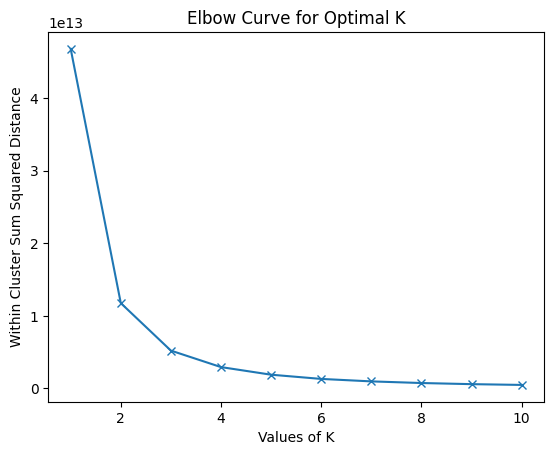

In [ ]:
# 2.1.1. Determine Value of 'K' in K-Means using Elbow Curve & KMeans-Inertia
# ---------------------------------------------------------------------------
'''
KMeans-Inertia : Sum of Squared Distances of Samples to their closest Cluster Center (Centroid), Weighted by the Sample Weights (if provided)
'''
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,11) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state=111)
    kmeans.fit(df_1)
    wcssd.append(kmeans.inertia_)
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K')
plt.ylabel('Within Cluster Sum Squared Distance')
plt.title('Elbow Curve for Optimal K')
plt.show()

In [30]:
#2.1.2. Create K-Means Clusters [K=2]
# ------------------------------------------

km_df_1cluster = kmclus(n_clusters=2, init='random', random_state=222)
km_df_1cluster_model = km_df_1cluster.fit_predict(df_1); km_df_1cluster_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([1, 1, 1, ..., 1, 0, 0], dtype=int32)

In [31]:
# 2.1.3. K-Means Clustering Model Evaluation [K=2]]
# ------------------------------------------------------

dbscore_km_df_1cluster = dbscore(df_1, km_df_1cluster_model); dbscore_km_df_1cluster

0.501657972210319

In [32]:
sscore_km_df_1cluster = sscore(df_1, km_df_1cluster_model); sscore_km_df_1cluster

0.6257016833979971

In [33]:
# 2.2. Create a KMeans Cluster Member Dataframe
# ---------------------------------------------

# Cluster Model Used : km_df_1cluster_model
kmeans = KMeans(n_clusters=2, random_state=42)


df_subset_kmcluster = df_1.copy()
df_subset_kmcluster.reset_index(level=0, inplace=True, names='Car_Index')
df_subset_kmcluster['cluster_number'] = km_df_1cluster_model
df_subset_kmcluster.sort_values('cluster_number', inplace=True); df_subset_kmcluster

Car_Index  Brand  Model  Condition  Color    Price    Mileage  \
49999      49999      4      1          0      3  20216.0  10.251448   
55618      55618     12     13          0      2  25338.0  12.451942   
55619      55619     13     11          1      5   8755.0   9.256639   
55620      55620     15     11          0      1  12496.0   9.856231   
55621      55621     17     20          0      1  18446.0  14.847070   
...          ...    ...    ...        ...    ...      ...        ...   
58660      58660      8     13          0      0  43342.0   9.731620   
58661      58661     19     13          0      0  68502.0  11.489709   
58664      58664      1     11          1      3  50302.0   5.829184   
58649      58649     16     11          0      0  77404.0   9.488544   
0              0     11     13          0      1  65732.0  12.032885   

       Price_std  Mileage_std  cluster_number  
49999  -1.031727     0.088715               0  
55618  -0.794951     0.852168               0  
55619  -1.561540    -0.256429               0  
55620  -1.388603    -0.048403               0  
55621  -1.113550     1.683149               0  
...          ...          ...             ...  
58660   0.037328    -0.091637               1  
58661   1.200409     0.518325               1  
58664   0.359070    -1.445571               1  
58649   1.611926    -0.175971               1  
0       1.072359     0.706778               1  

[100000 rows x 10 columns]

[Text(0.5, 1.0, 'Mileage vs Price Scatter Plot : K-Means Clusters')]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



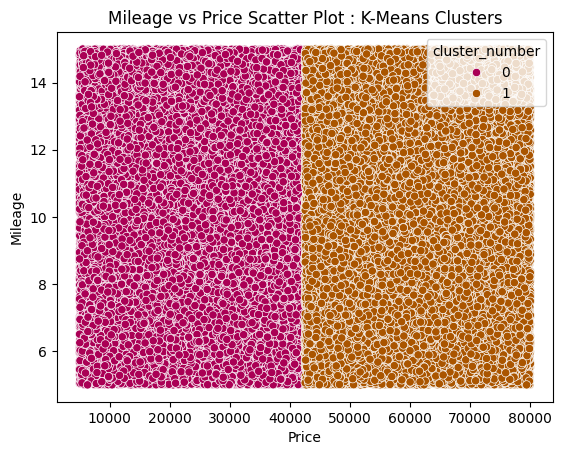

In [34]:
#2.3. Plot the K-Means Clustered Data
# ------------------------------------

# Cluster Model Used : km_df_1cluster_model

km_clusterplot_sb = sns.scatterplot(x='Price', y='Mileage', hue='cluster_number', palette='brg', data=df_subset_kmcluster)
km_clusterplot_sb.set(title='Mileage vs Price Scatter Plot : K-Means Clusters')

**GAUSSIAN MIXTURE MODEL CLUSTERING**

Gaussian Mixture Model (GMM) clustering is a probabilistic model that represents a mixture of Gaussian (normal) distributions. Unlike K-Means, GMM does not assign each data point to a specific cluster but rather provides probabilities indicating the likelihood of each point belonging to each cluster.

**Objectives:**

1. Cluster the Cars based on categorical and non-categorical variables.

           Cat Variables: 'Brand', 'Color', 'Condition', 'Model'

           Non-Cat Variables: 'Price', 'Mileage'

2. Determine the optimal number of components (clusters) for GMM.

3. Fit Gaussian Mixture Model.

4. Evaluate the GMM model.

5. Create a GMM cluster member dataframe.

6. Plot the GMM cluster data.

In [53]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

# Extracting features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_1)

# Specify the number of clusters (adjust as needed)
n_clusters = 2

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
df_1['GMM_Labels'] = gmm.fit_predict(scaled_features)

# Calculate Davies-Bouldin Score
db_score = davies_bouldin_score(scaled_features, df_1['GMM_Labels'])

print("Davies-Bouldin Score:", db_score)


Davies-Bouldin Score: 1.5580009787126718


In [40]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_features, df_1['GMM_Labels'])
print("Silhouette Score for GMM Clustering:", silhouette_avg)

Silhouette Score for GMM Clustering: 0.180067490383894


In [55]:
# Number of clusters (3)
n_clusters = 3

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
df_1['GMM_Labels1'] = gmm.fit_predict(scaled_features)

# Calculate Davies-Bouldin Score
db_score = davies_bouldin_score(scaled_features, df_1['GMM_Labels1'])

print("Davies-Bouldin Score:", db_score)

Davies-Bouldin Score: 1.4239212580423655


In [56]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_features, df_1['GMM_Labels1'])
print("Silhouette Score for GMM Clustering:", silhouette_avg)

Silhouette Score for GMM Clustering: 0.2637187906890499


In [57]:
# Number of clusters (4)
n_clusters = 4

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
df_1['GMM_Labels2'] = gmm.fit_predict(scaled_features)

# Calculate Davies-Bouldin Score
db_score = davies_bouldin_score(scaled_features, df_1['GMM_Labels2'])

print("Davies-Bouldin Score:", db_score)

Davies-Bouldin Score: 3.5851671988226714


In [58]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_features, df_1['GMM_Labels2'])
print("Silhouette Score for GMM Clustering:", silhouette_avg)

Silhouette Score for GMM Clustering: 0.21519577654576688


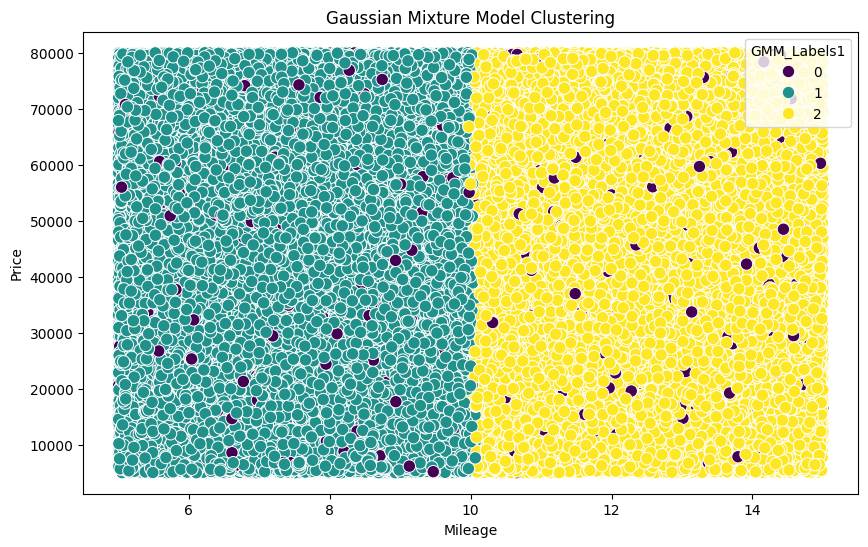

In [59]:
# Scatter plot with color-coded clusters [n_clusters = 3, as the s-score and db-score are best suitable in this case]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Price', hue='GMM_Labels1', data=df_1, palette='viridis', legend='full', s=80)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

**For K-Means Clusters**

1. Calculating Time Taken
2. Calculating Memory Used
3. Calculating Size


In [69]:
#1 Calculating time-taken
import time

start_time_kmeans = time.time()
kmeans_model = kmeans.fit(df_1)
end_time_kmeans = time.time()
time_taken_kmeans = end_time_kmeans - start_time_kmeans

print("K-Means Time Taken:", time_taken_kmeans, "seconds")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



K-Means Time Taken: 2.261160373687744 seconds


In [76]:
#2 Calculate Memory Used
import psutil
from sklearn.cluster import KMeans

n_clusters = 2

kmeans = KMeans(n_clusters=n_clusters, random_state=42)

before_memory = psutil.virtual_memory().used
kmeans.fit(df_1)

after_memory = psutil.virtual_memory().used

memory_used = after_memory - before_memory
print(f"Memory used for K-Means clustering: {memory_used / (1024 * 1024):.2f} MB")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Memory used for K-Means clustering: 16.00 MB


In [77]:
#3 Calculating the size
# Count the size of each cluster
cluster_sizes = df_subset_kmcluster['cluster_number'].value_counts()

# Display the cluster sizes
print("Cluster Sizes:")
print(cluster_sizes)

Cluster Sizes:
1    50033
0    49967
Name: cluster_number, dtype: int64


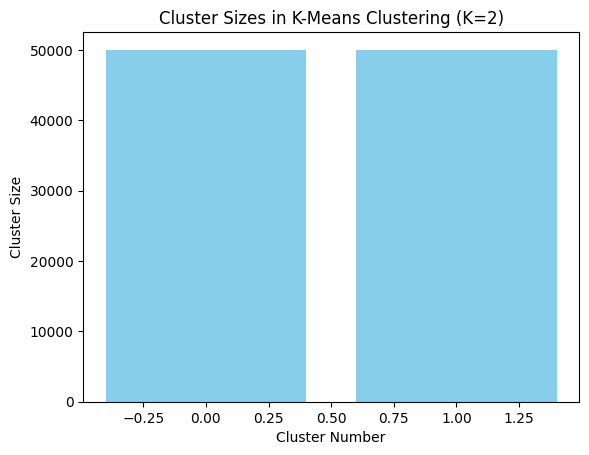

In [78]:
#Plotting the Clusters
plt.bar(cluster_sizes.index, cluster_sizes.values, color='skyblue')
plt.xlabel('Cluster Number')
plt.ylabel('Cluster Size')
plt.title('Cluster Sizes in K-Means Clustering (K=2)')
plt.show()

**For Gaussian Mixture Model Clusters**

1. Calculating Time Taken
2. Calculating Memory Used
3. Calculating Size


In [93]:
#1 Calculating the time-taken
import time
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Start the timer
start_time = time.time()

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
df_1['GMM_Labels'] = gmm.fit_predict(scaled_features)

# Stop the timer
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

print(f"Time taken for Gaussian Mixture Model clustering: {time_taken:.4f} seconds")


Time taken for Gaussian Mixture Model clustering: 0.7885 seconds


In [94]:
#2 Calculating the Memory Used

# Before fitting the model, get the current memory usage
before_memory = psutil.virtual_memory().used

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
df_1['GMM_Labels'] = gmm.fit_predict(scaled_features)

# After fitting the model, get the memory usage again
after_memory = psutil.virtual_memory().used

# Calculate the memory used by the GMM clustering
memory_used = after_memory - before_memory

print(f"Memory used for Gaussian Mixture Model clustering: {memory_used / (1024 * 1024):.2f} MB")

Memory used for Gaussian Mixture Model clustering: -26.14 MB


In [90]:
#3 Calculating the Size of Clusters

# Create a DataFrame to store cluster sizes
cluster_sizes_df = pd.DataFrame(df_1['GMM_Labels'].value_counts()).reset_index()
cluster_sizes_df.columns = ['Cluster', 'Size']

print("Cluster Sizes:")
print(cluster_sizes_df)

Cluster Sizes:
   Cluster   Size
0        1  49126
1        2  48344
2        0   2530


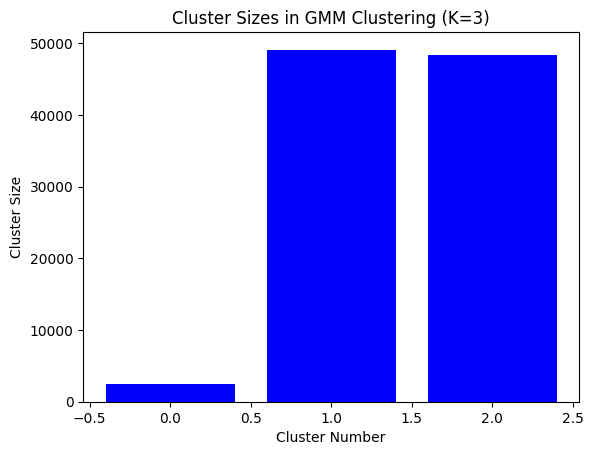

In [92]:
# Plotting the cluster sizes
plt.bar(cluster_sizes_df['Cluster'], cluster_sizes_df['Size'], color='blue')
plt.xlabel('Cluster Number')
plt.ylabel('Cluster Size')
plt.title('Cluster Sizes in GMM Clustering (K=3)')
plt.show()

# **COMPARISION**

**1. Time Efficiency:**

K-Means: It took 2.26 seconds for K-Means clustering.

GMM: GMM performed more quickly, taking only 0.79 seconds.

Elaboration: GMM was more time-efficient in this scenario. K-Means can be
computationally expensive, especially as the number of data points or dimensions increases. GMM, although involving more complex computations, may have benefited from the nature of the provided dataset or the efficiency of the implementation.

---

**2. Memory Usage:**

K-Means: Used 16.00 MB of memory.

GMM: Indicated a decrease in memory usage (-26.14 MB).

Elaboration: Memory usage comparison is less straightforward. The negative value for GMM might be due to the way memory profiling tools report changes in memory consumption. It could suggest a reduction in memory usage during the GMM process, but further investigation is needed to validate this interpretation.


---


**3. Cluster Sizes:**

K-Means:

    Cluster 1: 50033
    Cluster 0: 49967

GMM:

    Cluster 1: 49126
    Cluster 2: 48344
    Cluster 0: 2530

Elaboration: The cluster sizes differ between the two algorithms. K-Means tends to produce clusters of relatively balanced sizes, while GMM, being a probabilistic model, allows for more flexibility in cluster assignments, resulting in different-sized clusters.

**4. Algorithm Choice:**

K-Means: Suitable for spherical clusters, efficient with numerical features.

GMM: More flexible, accommodates clusters of different shapes, handles mixed types of features.

Elaboration: The choice between K-Means and GMM depends on the data characteristics. K-Means assumes spherical clusters, which may not always reflect the underlying data distribution. GMM, being probabilistic, is more versatile and can capture more complex structures in the data.

**5. Evaluation Metrics:**

K-Means:

    Davies-Bouldin Score (DB): DB score for K-Means is 0.502, indicating good separation between clusters.

    Silhouette Score: Silhouette Score is 0.626, indicating well-defined clusters.

GMM:

    Davies-Bouldin Score (DB): DB score for GMM is higher at 1.42, suggesting less distinct separation between clusters.

    Silhouette Score: Silhouette Score is lower at 0.264, indicating some overlap or ambiguity in cluster assignments.

Analysis:

K-Means outperforms GMM in both DB and Silhouette scores, suggesting more distinct and well-defined clusters.
GMM's higher DB score and lower Silhouette Score indicate potential challenges in precisely defining cluster boundaries.

**Conclusion:**

The choice between K-Means and GMM depends on the characteristics of the data and the specific goals of clustering. If clear, spherical clusters are expected, K-Means might be preferred. GMM can be advantageous when dealing with clusters of different shapes or when there's uncertainty about the cluster shape. It's crucial to consider both computational efficiency and the underlying assumptions of each method in making a decision.